In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import torch
import torchvision

In [ ]:
import os
import warnings

import torch
import torch.nn as nn
import torchvision
from torchvision import datasets
from torchvision import io
from torchvision import models
from torchvision import ops
from torchvision import datasets, models, transforms
from torchvision import utils

In [ ]:
from __future__ import print_function, division

import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import time
import copy

In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/ECG_Project/ECG_Data.csv', header= None)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,-0.097857,-0.156880,-0.137820,-0.137180,-0.147680,-0.168520,-0.175890,-0.17024,-0.181130,-0.14647,...,-0.16150,-0.12476,-0.10520,-0.094394,-0.124970,-0.104610,-0.12668,-0.074905,-0.11653,-0.18042
1,0.119360,0.187560,0.169570,0.178590,0.211820,0.196610,0.072911,0.16588,0.083204,0.19923,...,-0.14173,-0.12142,-0.11378,-0.087638,-0.097274,-0.089068,-0.10562,-0.097218,-0.12394,-0.10648
2,-0.024602,-0.036279,-0.035968,-0.030194,-0.045812,-0.093124,-0.091381,-0.12895,-0.112480,-0.12733,...,-0.32789,-0.30844,-0.28238,-0.269380,-0.248780,-0.247610,-0.19172,-0.186140,-0.12998,-0.12236
3,-0.508310,-0.808010,-0.721680,-0.789720,-0.767680,-0.774350,-0.772500,-0.79432,-0.794940,-0.77814,...,-0.95345,-0.94342,-0.97155,-0.988560,-0.994920,-0.996750,-1.01540,-1.042700,-1.04070,-1.04820
4,-0.312040,-0.495260,-0.442600,-0.465250,-0.428400,-0.444370,-0.417600,-0.45334,-0.429220,-0.44191,...,0.39209,0.43470,0.52352,0.592920,0.663010,0.743780,0.80943,0.822490,0.78724,0.68429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,-0.075000,-0.165000,-0.225000,-0.175000,-0.225000,-0.225000,-0.215000,-0.18500,-0.235000,-0.21500,...,-0.16500,-0.26500,-0.50500,-0.315000,0.575000,1.775000,1.31500,-0.195000,-0.72500,-0.49500
158,-0.185000,-0.155000,-0.145000,-0.135000,-0.105000,-0.095000,-0.095000,-0.06500,-0.055000,-0.02500,...,0.10500,0.10500,0.15500,0.125000,0.175000,0.155000,0.18500,0.225000,0.22500,0.15500
159,-0.355000,-0.355000,-0.345000,-0.335000,-0.335000,-0.345000,-0.345000,-0.37500,-0.365000,-0.35500,...,-0.12500,-0.17500,-0.22500,-0.235000,-0.275000,-0.315000,-0.35500,-0.335000,-0.31500,-0.31500
160,-0.275000,-0.245000,-0.285000,-0.265000,-0.235000,-0.215000,-0.165000,-0.16500,-0.145000,-0.09500,...,0.01500,-0.09500,-0.07500,-0.105000,-0.145000,-0.165000,-0.16500,-0.205000,-0.14500,-0.16500


In [ ]:
data.shape

(162, 65536)

In [ ]:
labels=pd.read_csv('/content/drive/MyDrive/ECG_Project/label_ecg2.csv')

In [ ]:
labels

,labels
0,ARR
1,ARR
2,ARR
3,ARR
4,ARR
...,...
157,NSR
158,NSR
159,NSR
160,NSR


In [ ]:
data1=data.iloc[:, 0:10000]

In [ ]:
data1.shape

(162, 10000)

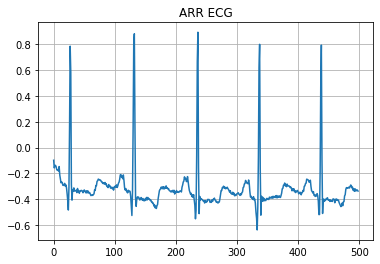

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.grid()
plt.plot(np.arange(499), data.iloc[0, 0:499])
plt.title("ARR ECG")
plt.show()

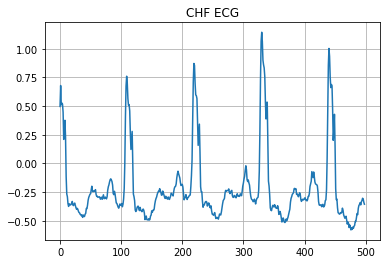

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.grid()
plt.plot(np.arange(499), data.iloc[96, 0:499])
plt.title("CHF ECG")
plt.show()

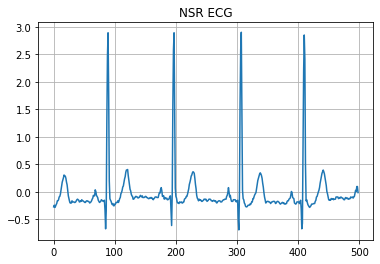

In [ ]:
plt.grid()
plt.plot(np.arange(499), data.iloc[160, 0:499])
plt.title("NSR ECG")
plt.show()

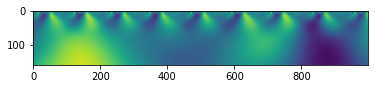

In [ ]:
coeff_ARR=[]
coeff_CHF=[]
coeff_NSR=[]
freq_ARR=[]
freq_CHF=[]
freq_NSR=[]
c=1
d=1
e=1
for i in range (162):
  if (i>=0 and i<=95):
    coef, freqs=pywt.cwt(data.iloc[i, 0:999],np.arange(1,162),'gaus1')
    coeff_ARR.append(coef)
    freq_ARR.append(freqs)
    plt.imshow(coef);
    #name= "/content/drive/MyDrive/ECG_Project/ARR_Scalogram/ARR_SC"+str(c)+".jpeg"
    #plt.savefig(name)
    c=c+1
  elif(i>=96 and i<=125):
      coef, freqs=pywt.cwt(data.iloc[i, 0:999],np.arange(1,162),'gaus1')
      coeff_CHF.append(coef)
      freq_CHF.append(freqs)
      plt.imshow(coef);
      #name= "/content/drive/MyDrive/ECG_Project/CHF_Scalogram/CHF_SC"+str(d)+".jpeg"
      #plt.savefig(name)
      d=d+1
  else:
      coef, freqs=pywt.cwt(data.iloc[i, 0:999],np.arange(1,162),'gaus1')
      coeff_NSR.append(coef)
      freq_NSR.append(freqs)
      plt.imshow(coef);
      #name= "/content/drive/MyDrive/ECG_Project/NSR_Scalogram/NSR_SC"+str(e)+".jpeg"
      #plt.savefig(name)
      e=e+1

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
data_dir='/content/drive/MyDrive/ECG_Project/For_train&test'

In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/drive/MyDrive/ECG_Project/For_train&test'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=32,
                                             shuffle=True, num_workers=3)
              for x in ['train', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


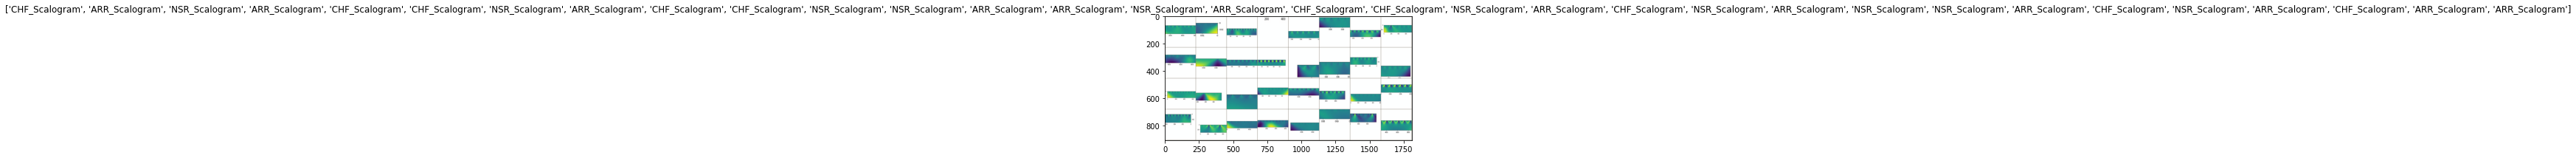

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
#visualize model prediction
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['test']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [ ]:
model_ft = models.vgg16(pretrained=True)
model_ft.fc = nn.Linear(4096, 3)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=25)

Epoch 0/24
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 8.5764 Acc: 0.0000
test Loss: 5.3984 Acc: 0.0909

Epoch 1/24
----------
train Loss: 4.5665 Acc: 0.1818
test Loss: 1.2742 Acc: 0.6061

Epoch 2/24
----------
train Loss: 1.9011 Acc: 0.4091
test Loss: 1.5328 Acc: 0.1515

Epoch 3/24
----------
train Loss: 1.7389 Acc: 0.2727
test Loss: 1.1854 Acc: 0.6061

Epoch 4/24
----------
train Loss: 1.3261 Acc: 0.4091
test Loss: 1.0731 Acc: 0.3939

Epoch 5/24
----------
train Loss: 1.2289 Acc: 0.3182
test Loss: 1.0657 Acc: 0.1818

Epoch 6/24
----------
train Loss: 1.2196 Acc: 0.3977
test Loss: 0.9497 Acc: 0.6061

Epoch 7/24
----------
train Loss: 1.3130 Acc: 0.3523
test Loss: 0.9788 Acc: 0.6061

Epoch 8/24
----------
train Loss: 1.1477 Acc: 0.4205
test Loss: 1.0220 Acc: 0.5758

Epoch 9/24
----------
train Loss: 1.1997 Acc: 0.2614
test Loss: 1.0609 Acc: 0.6061

Epoch 10/24
----------
train Loss: 1.1137 Acc: 0.4659
test Loss: 1.0757 Acc: 0.6364

Epoch 11/24
----------
train Loss: 1.1536 Acc: 0.3295
test Loss: 1.0746 Acc: 0.5758

Epoch 12/24


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


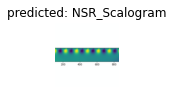

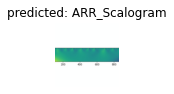

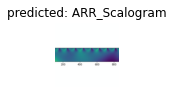

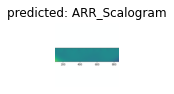

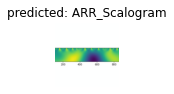

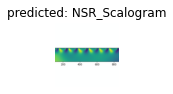

In [ ]:
visualize_model(model_ft)

## Part 4 - Making a single prediction

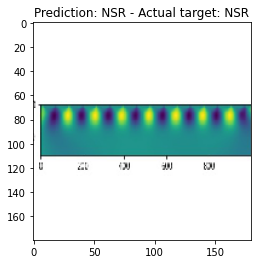

In [ ]:
# Disable grad
from keras.preprocessing import image
with torch.no_grad():
  test_image = image.load_img('/content/drive/MyDrive/ECG_Project/al_images/NSR_SC7.jpeg', target_size = (224, 224))
  preprocess = transforms.Compose([
                                   transforms.Resize(256),
                                   transforms.CenterCrop(224),
                                   transforms.ToTensor(),
                                   transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                   ])
  test_tensor = preprocess(test_image)
  test_batch = test_tensor.unsqueeze(0) # create a mini-batch as expected by the model
  # Generate prediction
  prediction = model_ft(test_batch)

  # Predicted class value using argmax
  predicted_class = np.argmax(prediction)
  # Reshape image
  test_process = transforms.Compose([
                                   transforms.CenterCrop(180)
                                   ])
  image = test_process(test_image)
  true_target="NSR"

  if predicted_class == 0:
    predicted_class = 'ARR'
  elif predicted_class == 1:
    predicted_class = 'CHF'
  elif predicted_class == 2:
    predicted_class = 'NSR'

  # Show result
  plt.imshow(image, cmap='gray')
  plt.title(f'Prediction: {predicted_class} - Actual target: {true_target}')
  plt.show()

In [ ]:
score = tf.nn.softmax(prediction[0])
perc=np.max(score)

In [ ]:
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(predicted_class, 100 * perc))

This image most likely belongs to NSR with a 34.33 percent confidence.


In [ ]:
#best accuracy=72

In [ ]:
#true also
''' if np.argmax(score) == 0:
  pred = 'ARR'
elif np.argmax(score) == 1:
  pred= 'CHF'
elif np.argmax(score) == 2:
  pred = 'NSR'
'''

" if np.argmax(score) == 0:\n  pred = 'ARR'\nelif np.argmax(score) == 1:\n  pred= 'CHF'\nelif np.argmax(score) == 2:\n  pred = 'NSR'\n"